# AR model

In [1]:
#import numpy as np
#import matplotlib.pyplot as plt
#import pandas as pd

In [2]:
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
#from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

In [3]:
#def format_predictions(predictions, values):
#    vals = np.concatenate(values, axis=0).ravel()
#    preds = np.concatenate(predictions, axis=0).ravel()
#    df_result = pd.DataFrame(data={"value": vals, "prediction": preds})
#    df_result = df_result.sort_index()
#    return df_result

#def calculate_metrics(df):
#    return {'rmse' : mean_squared_error(df.value, df.prediction) ** 0.5,
#            'mae' : mean_absolute_error(df.value, df.prediction),
#            'mape': mean_absolute_percentage_error(df.value, df.prediction),
#            'r2' : r2_score(df.value, df.prediction)}

In [31]:
def train_loop_ar(path,num_sim,str_sims,plot_res=False):
    
    df_sim = pd.DataFrame()
    
    # loop over all datasets in the simulation setup
    for j in range(len(str_sims)):

        #df_sim = pd.DataFrame()

        # load data
        data_name = 'sim'+str(num_sim)+'_'+str_sims[j]
        #data = np.load(path+'Temp/'+data_name+'.npz')
        with np.load(path+'Temp/'+data_name+'.npz') as data:
            y_train = data['y_train']
            y_val = data['y_val']
            y_test = data['y_test']

        # concatenate series into a single array
        #y_train = data['y_train']
        #y_val = data['y_val']
        #y_test = data['y_test']
        test_size = y_test.shape[0]
        y = np.concatenate((y_train,y_val,y_test),axis=0)

        # rolling/expanding window forecast
        i=0
        pred = []
        while i < test_size:
            #sel = ar_select_order(y[-(w_size+test_size-i):-(test_size-i)], maxlag=10, ic='bic') # rolling window
            sel = ar_select_order(y[:-(test_size-i)], maxlag=10, ic='bic') # expanding window
            #print(sel.ar_lags)
            res = sel.model.fit()
            #print(res.summary())
            pred.append(res.predict(start=test_size+i,end=test_size+i))
            i = i+1

        # evaluate on test set
        df_result = format_predictions(pred, y_test)
        result_metrics = calculate_metrics(df_result)
        print(result_metrics)

        # plot results
        if plot_res:
            plt.figure(figsize=(15,5))
            plt.plot(df_result.value, label="True")
            plt.plot(df_result.prediction, label="Prediction")
            plt.legend()
            plt.title("Test Set")
            plt.show()

        # append metrics on test set
        df_metrics = pd.DataFrame(np.expand_dims((result_metrics['rmse'],result_metrics['mae'],result_metrics['mape'],result_metrics['r2'],),axis=0),columns=['rmse','mae','mape','r2'])
        #df_sim = df_sim.append(df_metrics, ignore_index=True)
        df_sim = pd.concat([df_sim,df_metrics],axis=0, ignore_index=True)
        
        # delete variable
        #del data

        # save results
        #df_sim.to_csv(path+'Temp/'+data_name+'.csv')
    return df_sim

In [22]:
#path = 'C:/Users/Meier/Dropbox (Institut für Statistik)/Structural Breaks + DL/Simulation/Python Code/' 

In [23]:
#path= 'C:/Users/Johan/Dropbox (Institut für Statistik)/Structural Breaks + DL/Simulation/Python Code/'

In [24]:
#str_sims = ['Ref','Tau0.1Ref','Tau0.1Beta0.5','Tau0.1Beta1.0','Tau0.1Beta2.0','Tau0.2Ref','Tau0.2Beta0.5','Tau0.2Beta1.0','Tau0.2Beta2.0','Tau0.3Ref','Tau0.3Beta0.5','Tau0.3Beta1.0','Tau0.3Beta2.0','Tau0.4Ref','Tau0.4Beta0.5','Tau0.4Beta1.0','Tau0.4Beta2.0','Tau0.5Ref','Tau0.5Beta0.5','Tau0.5Beta1.0','Tau0.5Beta2.0','Tau0.6Ref','Tau0.6Beta0.5','Tau0.6Beta1.0','Tau0.6Beta2.0','Tau0.7Ref','Tau0.7Beta0.5','Tau0.7Beta1.0','Tau0.7Beta2.0'] 

In [25]:
#num_sim = 1

{'rmse': 11.42254227498476, 'mae': 8.489481742809604, 'mape': 0.4987950610089687, 'r2': -0.21514402273889077}


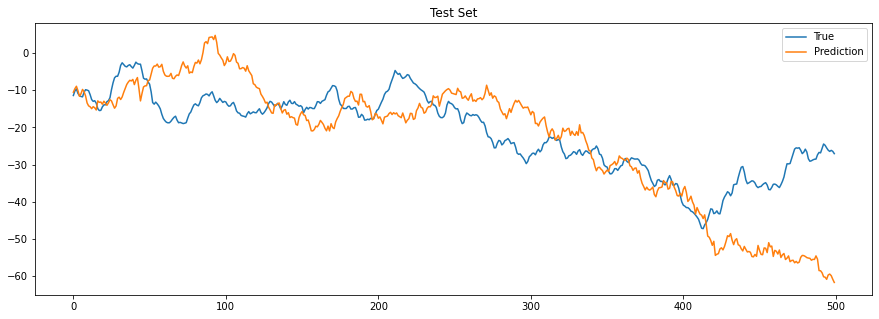

{'rmse': 40.56073381611551, 'mae': 38.52519075573637, 'mape': 2.9035179415197465, 'r2': -14.32194199745512}


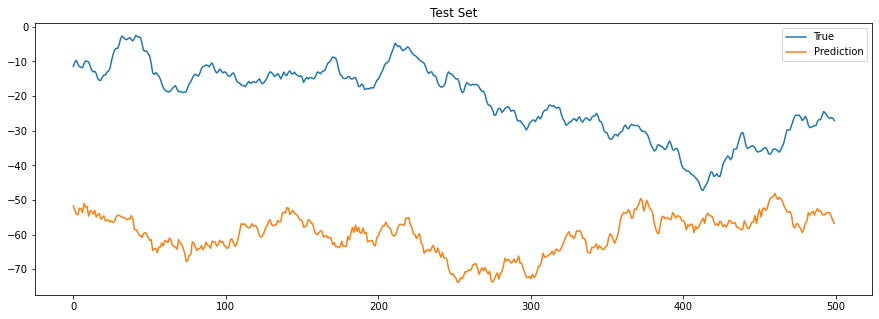

{'rmse': 11.41502443957398, 'mae': 8.485041288403373, 'mape': 0.498915008072917, 'r2': -0.21354503604669572}


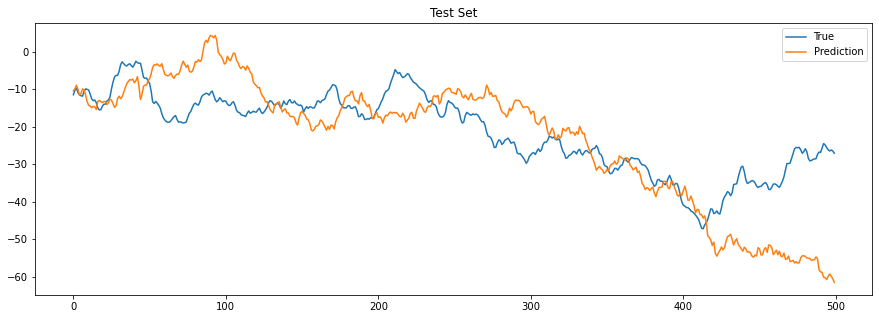

{'rmse': 11.407245983431006, 'mae': 8.480883931146218, 'mape': 0.49889340595821624, 'r2': -0.21189172540447898}


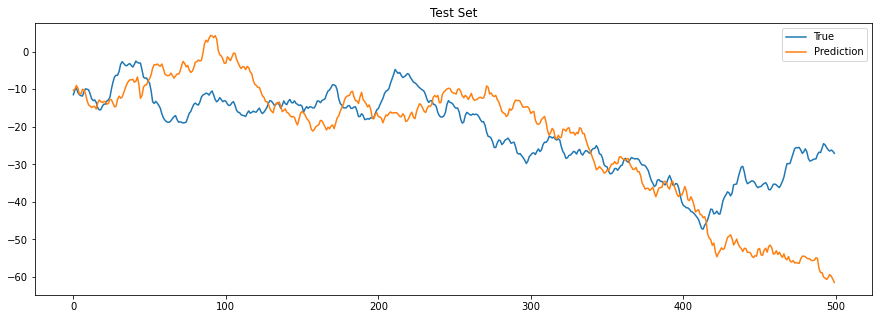

{'rmse': 11.39922108449268, 'mae': 8.47664770258748, 'mape': 0.4989982995155037, 'r2': -0.21018721446478117}


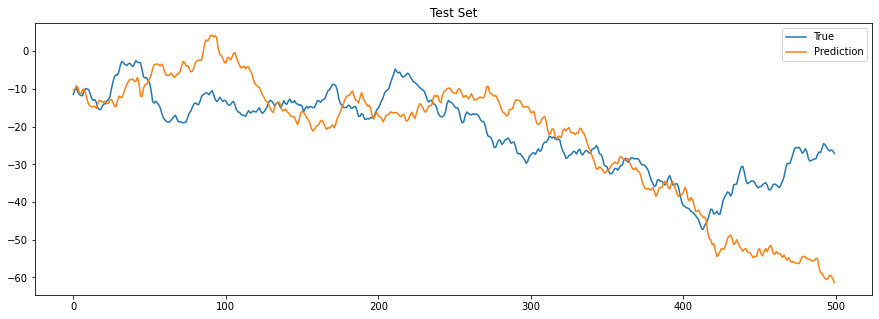

{'rmse': 38.27478263485129, 'mae': 36.64856532108012, 'mape': 2.6983252849061135, 'r2': -12.643558984939947}


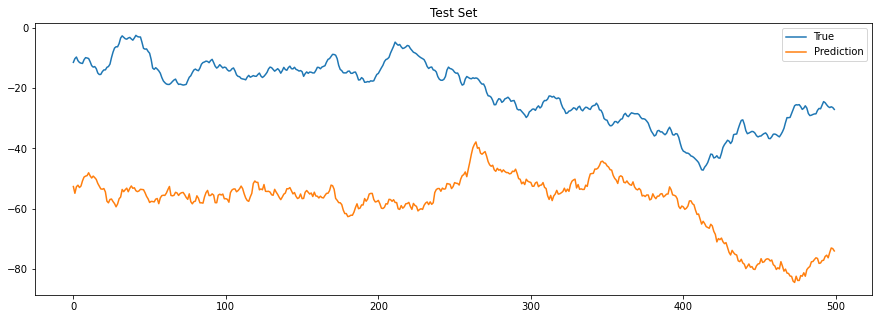

{'rmse': 21.094334793751464, 'mae': 19.631906851543558, 'mape': 1.173810786153973, 'r2': -3.1441348213516074}


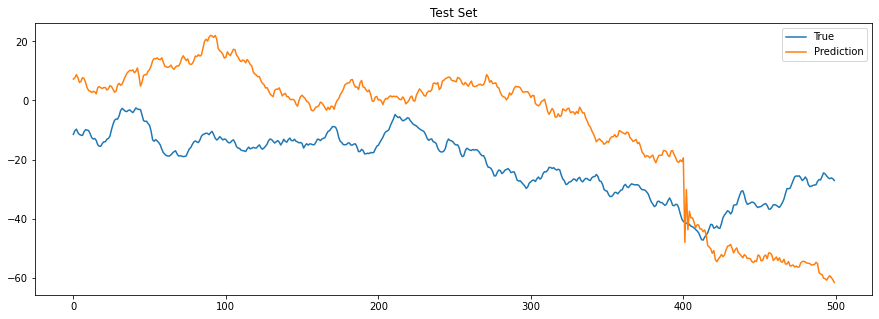

{'rmse': 35.45466403176985, 'mae': 33.75817622657766, 'mape': 2.2228735097584087, 'r2': -10.707089958844012}


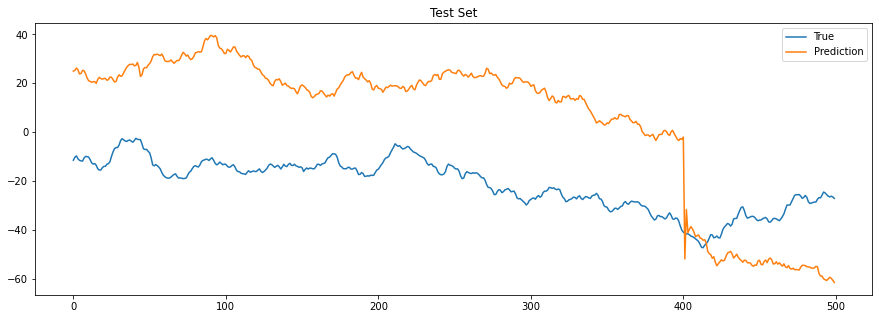

{'rmse': 66.12591026512678, 'mae': 61.99243807979401, 'mape': 4.320596913102916, 'r2': -39.72354098693041}


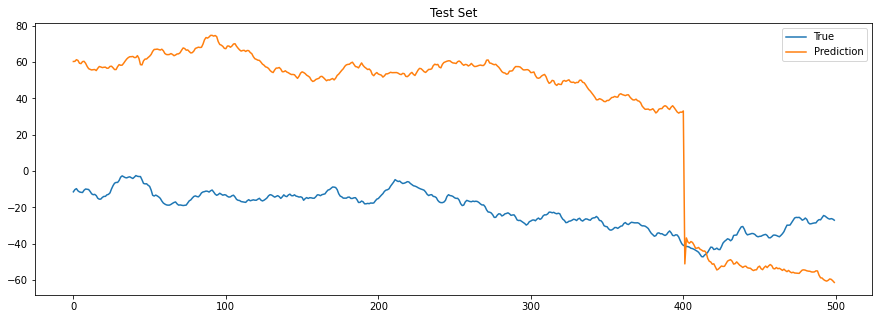

{'rmse': 69.0550796412528, 'mae': 68.61880795031561, 'mape': 4.579420199934726, 'r2': -43.41129814137333}


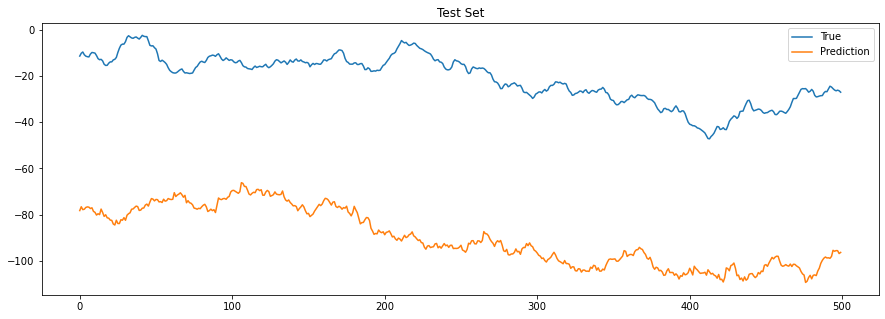

{'rmse': 19.59706367056412, 'mae': 17.749722779915057, 'mape': 1.1073314988719258, 'r2': -2.5767139957556093}


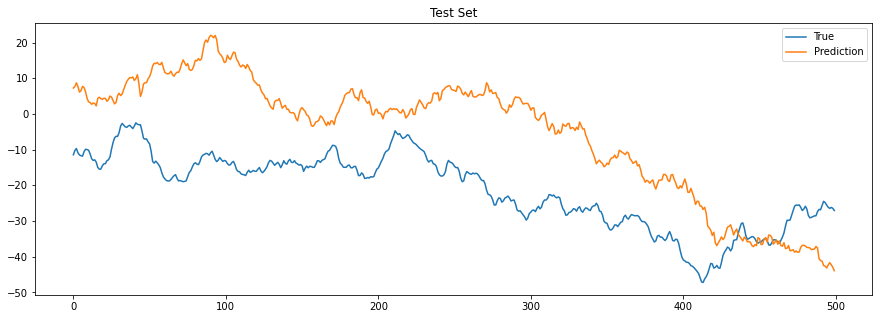

{'rmse': 35.47961109891349, 'mae': 33.635279975231235, 'mape': 2.1970662275030595, 'r2': -10.723570741719172}


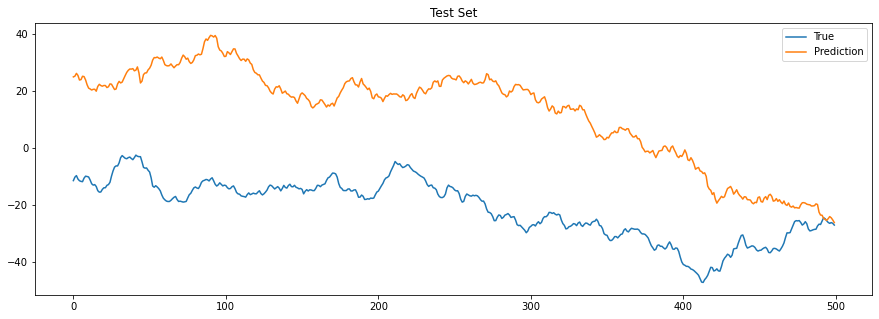

{'rmse': 69.78234834914235, 'mae': 68.86284191516596, 'mape': 4.503660414785465, 'r2': -44.35167875655517}


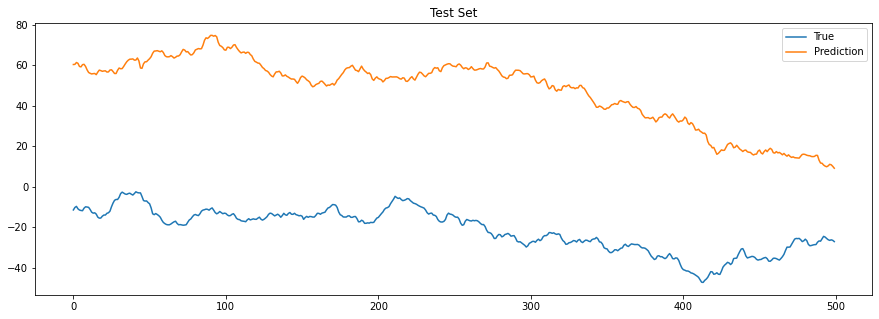

{'rmse': 89.30920867003185, 'mae': 88.903928623484, 'mape': 6.089242153676182, 'r2': -73.28389875548753}


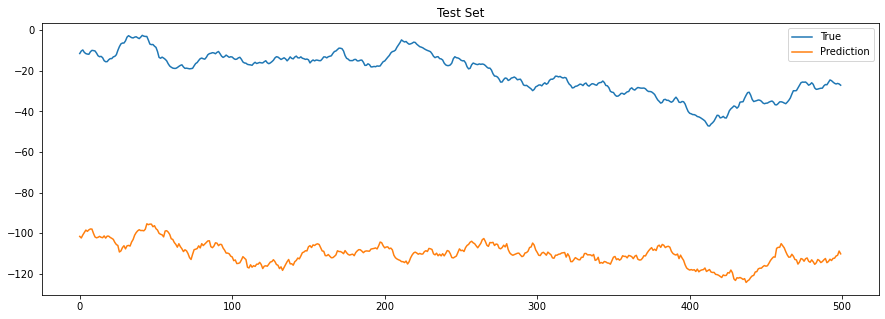

{'rmse': 19.598221795912423, 'mae': 17.750981923606595, 'mape': 1.1074402765892777, 'r2': -2.577136753532974}


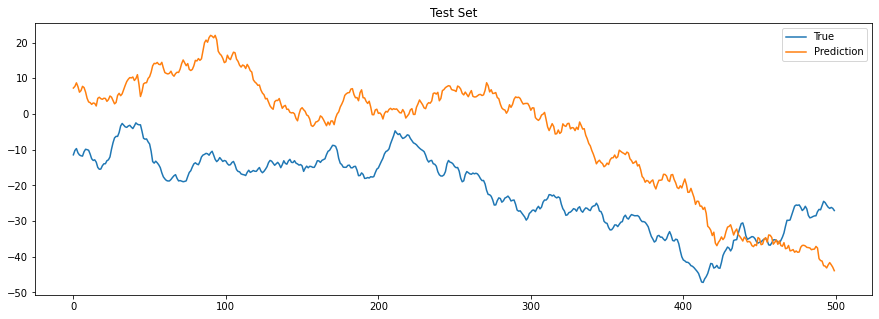

{'rmse': 35.48349633969262, 'mae': 33.639325464720294, 'mape': 2.1973069300360284, 'r2': -10.726138491909063}


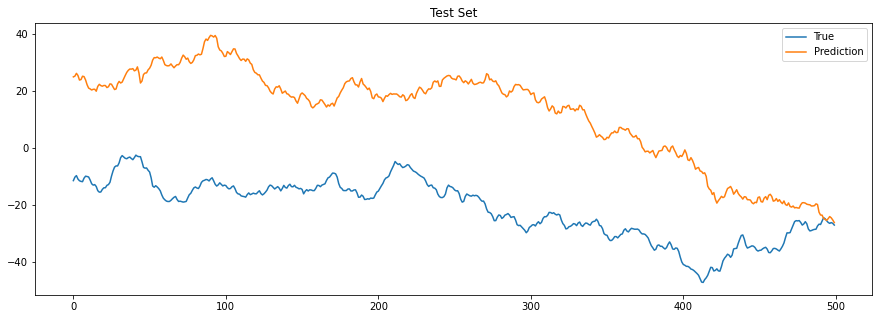

{'rmse': 69.79454961896178, 'mae': 68.87534959401553, 'mape': 4.504405276695177, 'r2': -44.36753939919993}


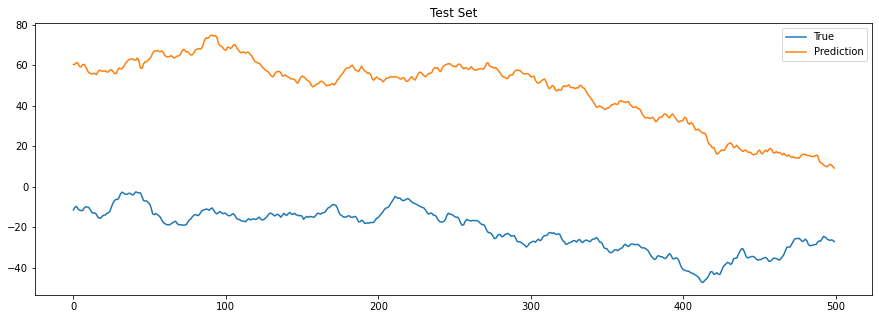

{'rmse': 78.17223802149937, 'mae': 75.50886854545458, 'mape': 5.671081267851671, 'r2': -55.91245215948332}


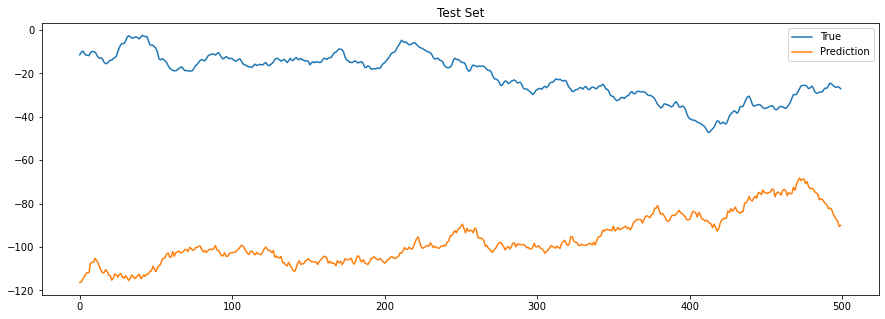

{'rmse': 19.598499314287334, 'mae': 17.751031304235017, 'mape': 1.1074018308321416, 'r2': -2.577238061520778}


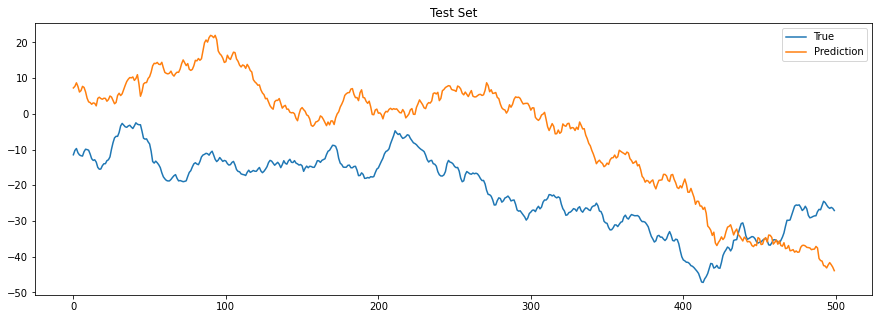

{'rmse': 35.483921008832716, 'mae': 33.63998988786467, 'mape': 2.1973182201481194, 'r2': -10.726419172194975}


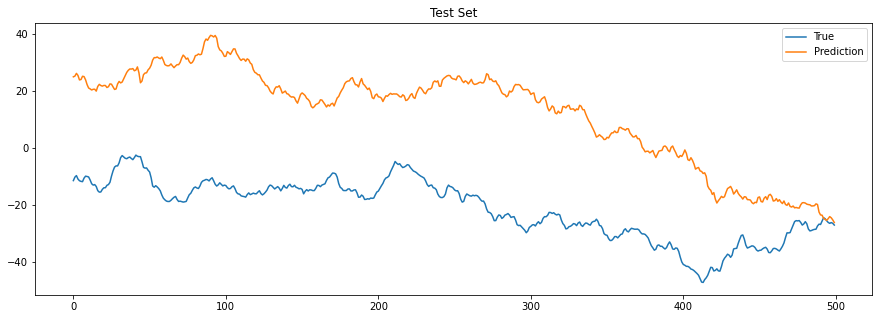

{'rmse': 69.79770535019259, 'mae': 68.87879805395019, 'mape': 4.504457683492123, 'r2': -44.371642040405106}


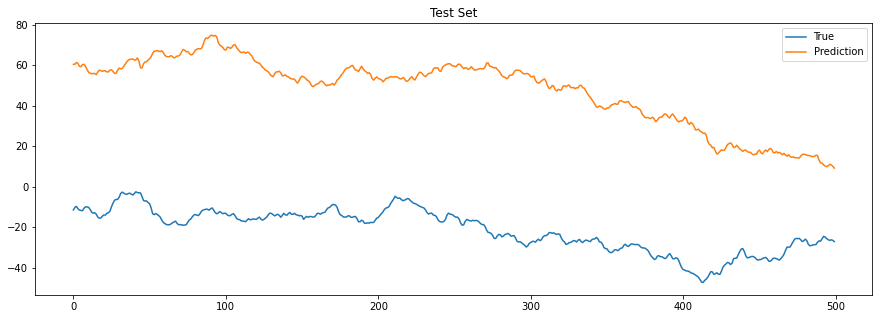

{'rmse': 65.15424481789634, 'mae': 62.759947344090804, 'mape': 4.549245756589758, 'r2': -38.535536592101124}


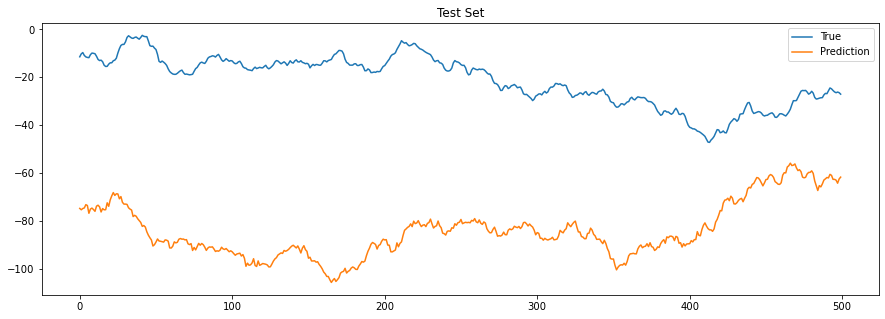

{'rmse': 19.596538593027926, 'mae': 17.7492039306205, 'mape': 1.107314341046314, 'r2': -2.576522331632436}


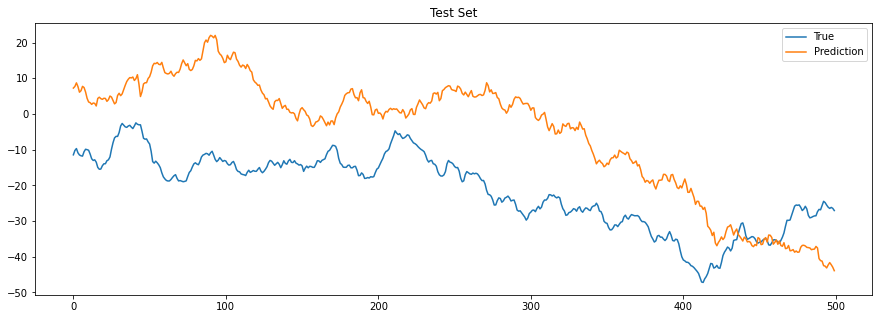

{'rmse': 35.48047583859976, 'mae': 33.63629362638791, 'mape': 2.1971360761437624, 'r2': -10.724142222641046}


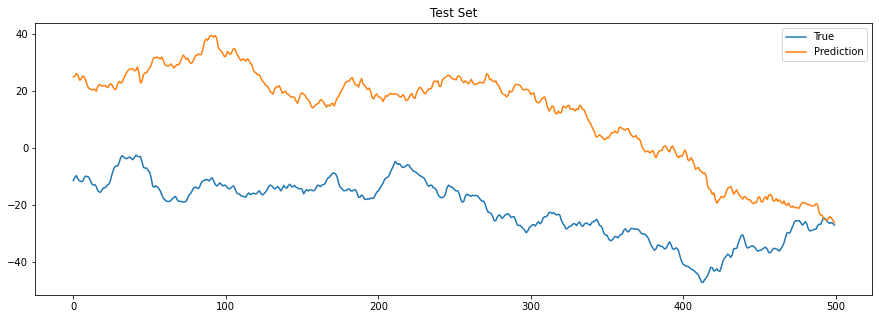

{'rmse': 69.79156817955267, 'mae': 68.87220307623456, 'mape': 4.504259844151449, 'r2': -44.363663518300626}


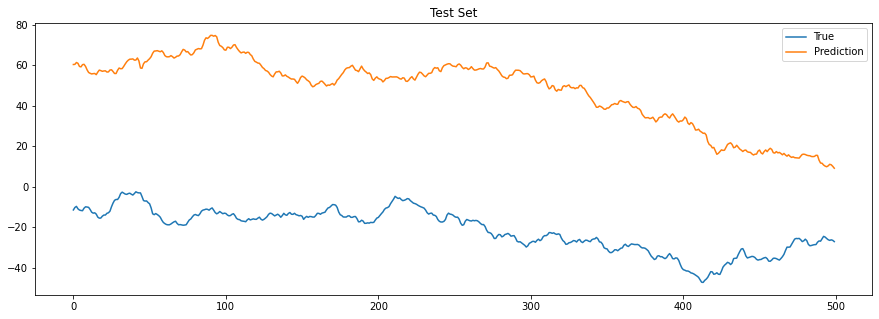

{'rmse': 42.17891244995453, 'mae': 38.703771188872054, 'mape': 3.03882156067363, 'r2': -15.568872730741614}


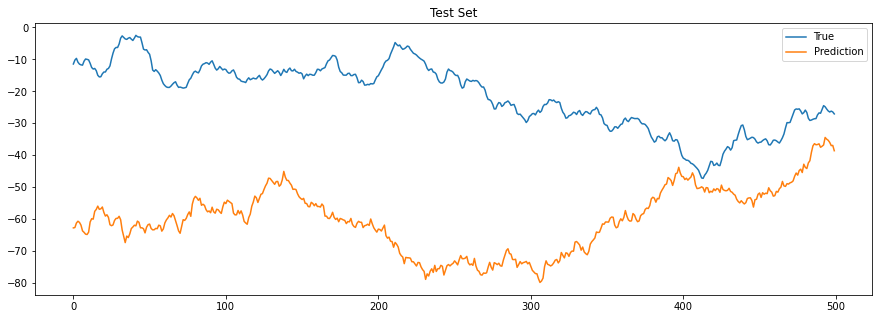

{'rmse': 19.59531918758517, 'mae': 17.748127076786922, 'mape': 1.1072334857998911, 'r2': -2.5760772433239447}


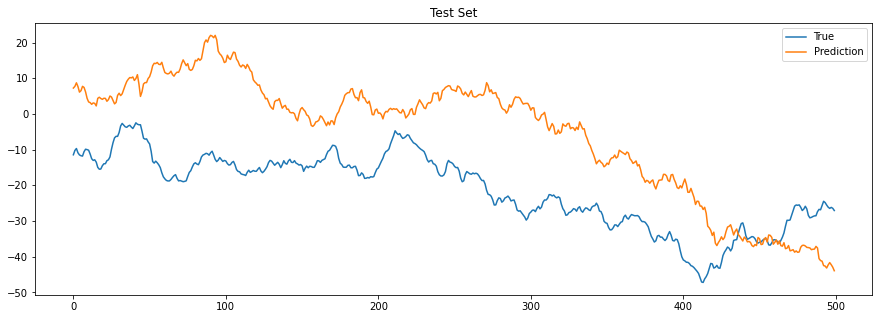

{'rmse': 35.47750149821663, 'mae': 33.63356302104783, 'mape': 2.1969480850078167, 'r2': -10.722176627355328}


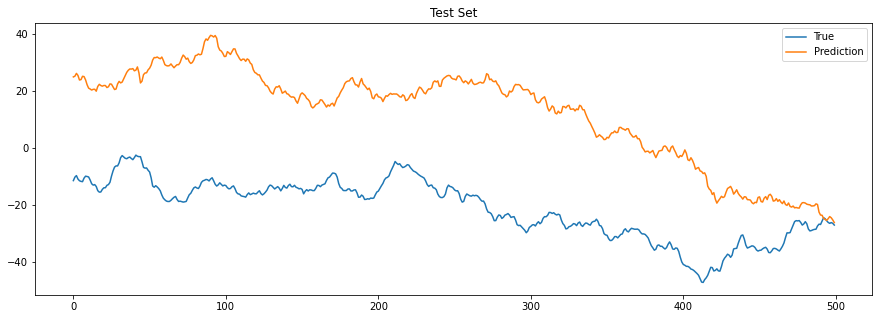

{'rmse': 69.78846433996522, 'mae': 68.86940247996952, 'mape': 4.503977372765992, 'r2': -44.35962869267914}


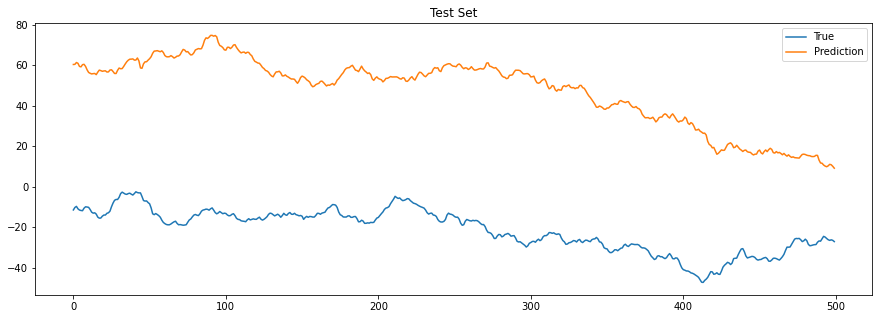

In [32]:
#df_sim = train_loop_ar(path=path,num_sim=num_sim,str_sims=str_sims)

In [33]:
#df_sim

,rmse,mae,mape,r2
0,11.422542,8.489482,0.498795,-0.215144
1,40.560734,38.525191,2.903518,-14.321942
2,11.415024,8.485041,0.498915,-0.213545
3,11.407246,8.480884,0.498893,-0.211892
4,11.399221,8.476648,0.498998,-0.210187
5,38.274783,36.648565,2.698325,-12.643559
6,21.094335,19.631907,1.173811,-3.144135
7,35.454664,33.758176,2.222874,-10.707090
8,66.125910,61.992438,4.320597,-39.723541
9,69.055080,68.618808,4.579420,-43.411298


In [30]:
#del df_sim

NameError: name 'df_sim' is not defined